In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Index(['UKPRN', 'Provider name', 'Level of study', 'Subject code', 'Subject',
#        'Question', 'Responses', 'Population', 
# 'Suppression reason', 
#         'Option 1',
#        'Option 2', 'Option 3', 'Option 4', 'Option 5',
# 'This does not apply to me', 
#         'Positivity measure (%)', 
# 'Benchmark (%)',
# 'Difference (ppt)', 'Standard deviation',
#        'Contribution to benchmark (%)', 'Materially below benchmark (%)',
#        'Broadly in line with benchmark (%)', 'Materially above benchmark (%)',
#        'Publication response headcount', 'Publication response rate (%)'],
#       dtype='object')

In [3]:
def load_data(path):
  return pd.read_csv(path)

def filter_columns(data):
  data = data[['UKPRN', 'Provider name', 'Subject code', 'Subject', 'Question', 'Responses', 'Population',
 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity measure (%)',
 'Publication response rate (%)']]
  data.rename(columns={'Positivity measure (%)': 'Positivity', 'Publication response rate (%)': 'Response Rate'}, inplace=True)
  return data

def drop_theme_rows(data):
  theme_df = data[data['Question'].str.contains('Theme')]
  theme_indices = list(theme_df.index.values) 
  data = data[~data.index.isin(theme_indices)]
  hc_df = data[data['Question'].str.contains('HC')]
  hc_indices = list(hc_df.index.values) 
  data = data[~data.index.isin(hc_indices)]
  return data

def get_qn_num(data):
  data[['Question Num', 'Question']] = data['Question'].str.split(':', expand=True)
  return data

def drop_null_surveys(data):
  null_prn = list(data[(data['Option 1'].isna())]['UKPRN'].unique())
  null_course = list(data[(data['Option 1'].isna())]['Subject code'].unique())
  if len(null_prn) == len(null_course):
    for i in range(len(null_prn)):
      data = data[~((data['UKPRN'] == null_prn[i]) & (data['Subject code'] == null_course[i]))]
  return data

In [58]:
# path = '../data/2024/NSS24-Level-03.csv'
path = '../data/2023/NSS3_2023.csv'
df = load_data(path)
df = filter_columns(df)
df = drop_theme_rows(df)
df = get_qn_num(df)
df = drop_null_surveys(df)
df.head()
# df.columns

C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\504899576.py:2: DtypeWarning: Columns (0,8) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)
C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\504899576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Positivity measure (%)': 'Positivity', 'Publication response rate (%)': 'Response Rate'}, inplace=True)


,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num
0,UK,UK,CAH01-01-01,Medical sciences (non-specific),How good are teaching staff at explaining thi...,226.8,296.1,60.82,146.13,18.33,1.5,NaN,91.3,76.6,Q01
1,UK,UK,CAH01-01-01,Medical sciences (non-specific),How often do teaching staff make the subject ...,226.8,296.1,34.99,144.30,41.99,5.5,NaN,79.1,76.6,Q02
2,UK,UK,CAH01-01-01,Medical sciences (non-specific),How often is the course intellectually stimul...,226.5,296.1,101.14,98.48,24.83,2.0,NaN,88.2,76.6,Q03
3,UK,UK,CAH01-01-01,Medical sciences (non-specific),How often does your course challenge you to a...,226.8,296.1,97.63,98.82,28.33,2.0,NaN,86.6,76.6,Q04
4,UK,UK,CAH01-01-01,Medical sciences (non-specific),To what extent have you had the chance to exp...,225.8,296.1,83.47,116.31,24.50,1.5,NaN,88.5,76.6,Q05


In [5]:
df['Population'].describe()

count    388781.000000
mean        190.528639
std         989.407669
min           0.200000
25%          20.300000
50%          41.900000
75%          98.000000
max       24940.000000
Name: Population, dtype: float64

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Responses'}>]], dtype=object)

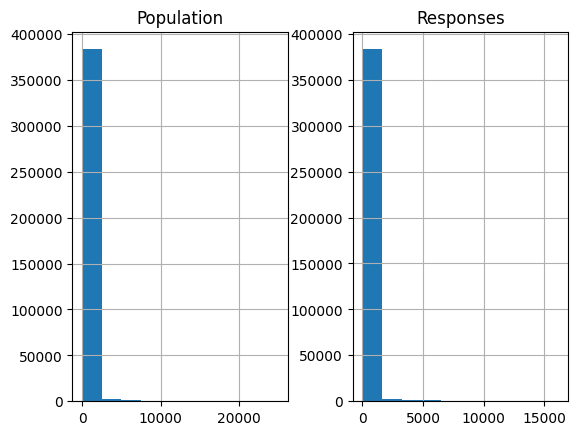

In [6]:
df[['Population', 'Responses']].hist()

In [7]:
len(df.columns)

15

In [8]:
df.columns

Index(['UKPRN', 'Provider name', 'Subject code', 'Subject', 'Question',
       'Responses', 'Population', 'Option 1', 'Option 2', 'Option 3',
       'Option 4', 'Option 5', 'Positivity', 'Response Rate', 'Question Num'],
      dtype='object')

<Axes: >

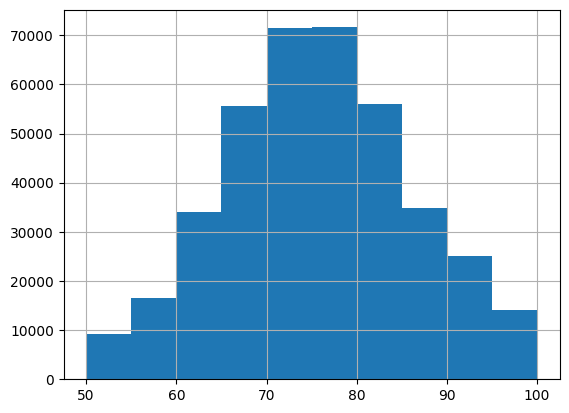

In [9]:
df['Response Rate'].hist()

In [10]:
df.head(2)

,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num
0,UK,UK,CAH01-01-01,Medical sciences (non-specific),How good are teaching staff at explaining thi...,226.8,296.1,60.82,146.13,18.33,1.5,NaN,91.3,76.6,Q01
1,UK,UK,CAH01-01-01,Medical sciences (non-specific),How often do teaching staff make the subject ...,226.8,296.1,34.99,144.30,41.99,5.5,NaN,79.1,76.6,Q02


In [11]:
len(df['Subject code'].unique())

164

In [26]:
def get_column_by_comprate(df, col):
  col_list = list(df[col].unique())
  comp_rate_list = []
  actual_val_list = []
  dic = {}

  for value in col_list:
    counter = 0
    sum_response, sum_sample, sum_actual = 0, 0, 0
    data = df[df[col] == value]
    for row in range(len(data)):
      sum_response += float(data.iloc[row]['Responses'])
      sum_sample += float(data.iloc[row]['Population'])
      sum_actual += float(data.iloc[row]['Positivity'])
      counter += 1
    if counter == 0:
      print(value)
      break
    avg_actual = round(sum_actual/counter, 2)
    avg_completion_rate = round(sum_response / sum_sample, 2)
    comp_rate_list.append(avg_completion_rate)
    actual_val_list.append(avg_actual)
    dic[value] = [avg_completion_rate, avg_actual]
  return_df = pd.DataFrame({'column': list(dic.keys()),
                              'comp-rate': comp_rate_list,
                              'actual-val': actual_val_list})
  return return_df

In [13]:
# comp_rates_by_subject = {}
# comp_rates_by_subject, comprate_subject, actualval_subject = get_column_by_comprate(df, 'Subject code', comp_rates_by_subject)
# subject_by_completion = pd.DataFrame({'subject': list(comp_rates_by_subject.keys()),
#                                    'comp-rate': comprate_subject,
#                                    'actual-val': actualval_subject})
subject_by_completion = get_column_by_comprate(df, 'Subject code')
subject_by_completion.to_csv('../data/2023/subject_by_completion_23.csv', index=False)

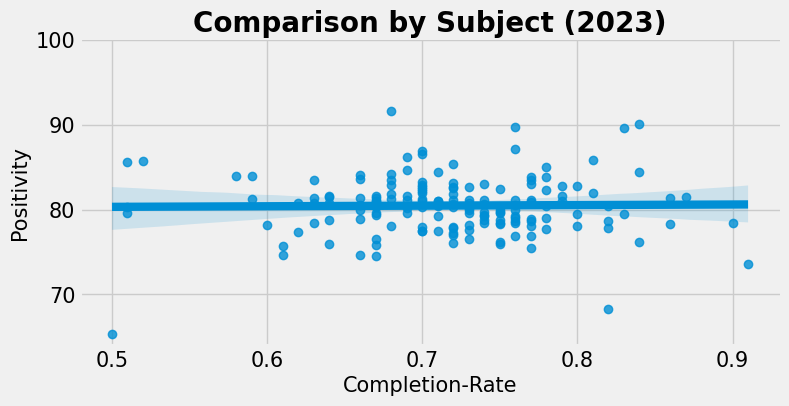

In [14]:
plt.style.use('fivethirtyeight')
ax = sns.lmplot(x='comp-rate', y='actual-val', data=subject_by_completion, legend=False, height=4, aspect=2)
plt.title('Comparison by Subject (2023)', fontsize=20, weight='bold')
plt.xlabel("Completion-Rate",fontsize=15)
plt.ylabel("Positivity",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(top=100)
plt.show()

In [15]:
d1 = pd.read_csv('../data/2022/subject-comp-rate-vs-actual-agree.csv', index_col=[0])
d2 = pd.read_csv('../data/2023/subject_by_completion_23.csv')

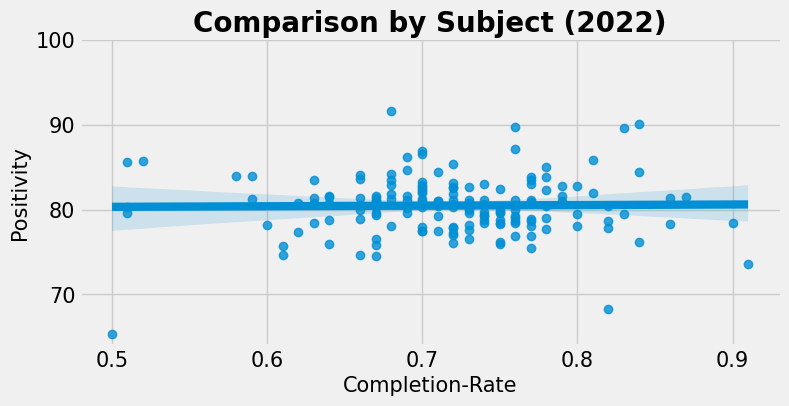

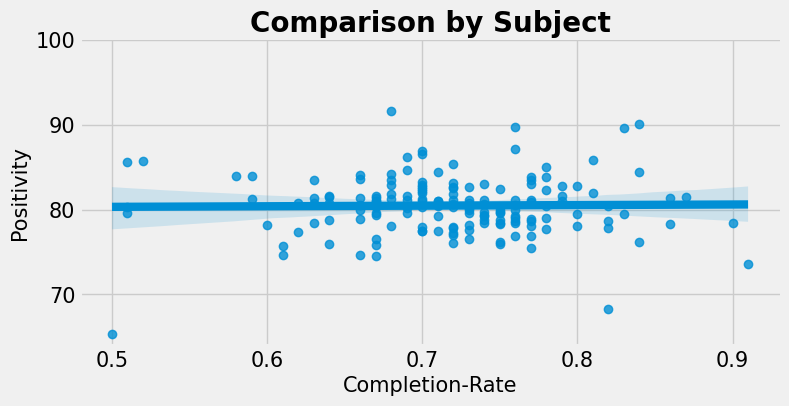

In [16]:
# plot-1
plt.style.use('fivethirtyeight')
ax = sns.lmplot(x='comp-rate', y='actual-val', data=subject_by_completion, legend=False, height=4, aspect=2)
plt.title('Comparison by Subject (2022)', fontsize=20, weight='bold')
plt.xlabel("Completion-Rate",fontsize=15)
plt.ylabel("Positivity",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(top=100)
plt.show()

#plot-2
plt.style.use('fivethirtyeight')
ax = sns.lmplot(x='comp-rate', y='actual-val', data=subject_by_completion, legend=False, height=4, aspect=2)
plt.title('Comparison by Subject', fontsize=20, weight='bold')
plt.xlabel("Completion-Rate",fontsize=15)
plt.ylabel("Positivity",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(top=100)
plt.show()

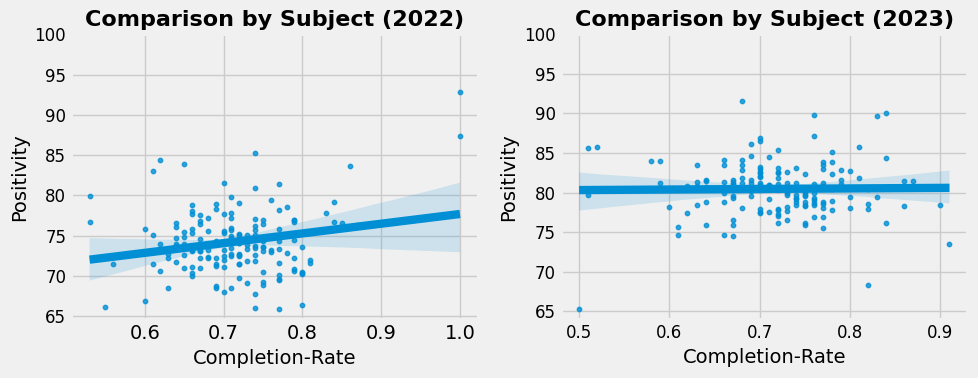

In [17]:
# Set the plot style
plt.style.use('fivethirtyeight')

# Create a figure and two subplots (2x1)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot 1: 2022 data
sns.regplot(x='comp-rate', y='actual-val', data=d1, ax=axes[0], scatter_kws={'s':10})
axes[0].set_title('Comparison by Subject (2022)', fontsize=16, weight='bold')
axes[0].set_ylabel("Positivity", fontsize=14)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_ylim(top=100)
axes[0].set_xlabel("Completion-Rate", fontsize=14)

# Plot 2: 2023 data
sns.regplot(x='comp-rate', y='actual-val', data=d2, ax=axes[1], scatter_kws={'s':10})
axes[1].set_title('Comparison by Subject (2023)', fontsize=16, weight='bold')
axes[1].set_xlabel("Completion-Rate", fontsize=14)
axes[1].set_ylabel("Positivity", fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_ylim(top=100)

# Set a common title for the entire figure
# fig.suptitle('Comparison by Subject (2022 & 2023)', fontsize=18, weight='bold')
# fig.tight_layout()
# fig.subplots_adjust(top=0.5)
# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])

# Show the plot
plt.show()

In [27]:
# comp_rates_by_provider = {}
# comp_rates_by_provider, comprate_provider, actualval_provider = get_column_by_comprate(df, 'Provider name')
# provider_by_completion = pd.DataFrame({'provider': list(comp_rates_by_provider.keys()),
#                                    'comp-rate': comprate_provider,
#                                    'actual-val': actualval_provider})
# provider_by_completion.to_csv('../data/2022/provider-comp-rate-vs-actual-agree.csv')

provider_by_completion = get_column_by_comprate(df, 'Provider name')
provider_by_completion.to_csv('../data/2023/provider_by_completion_23.csv', index=False)

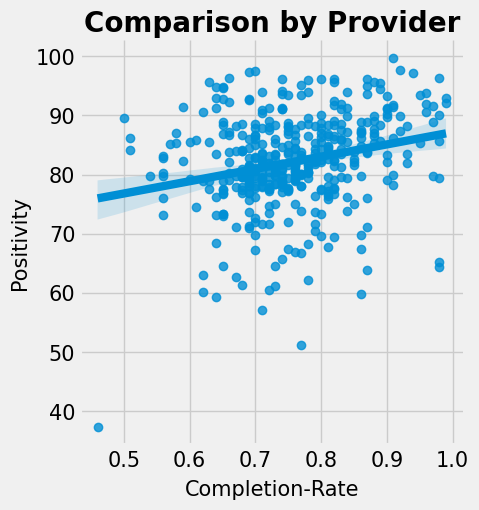

In [28]:
ax = sns.lmplot(x='comp-rate', y='actual-val', data=provider_by_completion, legend=False, height=5, aspect=1)
plt.title('Comparison by Provider', fontsize=20, weight='bold')
plt.xlabel("Completion-Rate",fontsize=15, labelpad=7)
plt.ylabel("Positivity",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
plt.show()

In [30]:
# comp_rates_by_question = {}
# comp_rates_by_question, comprate_question, actualval_question = get_column_by_comprate(df, 'Question Num', comp_rates_by_question)
# question_by_completion = pd.DataFrame({'question': list(comp_rates_by_question.keys()),
#                                    'comp-rate': comprate_question,
#                                    'actual-val': actualval_question})
# # question_by_completion.to_csv('../data/2022/question-comp-rate-vs-actual-agree.csv')

question_by_completion = get_column_by_comprate(df, 'Question Num')
question_by_completion.to_csv('../data/2023/question_by_completion_23.csv', index=False)

In [31]:
question_by_completion

,column,comp-rate,actual-val
0,Q01,0.72,91.14
1,Q02,0.72,81.67
2,Q03,0.72,85.13
3,Q04,0.72,84.79
4,Q05,0.72,83.09
5,Q06,0.72,84.47
6,Q07,0.72,83.40
7,Q08,0.72,77.31
8,Q09,0.72,82.31
9,Q10,0.72,76.86


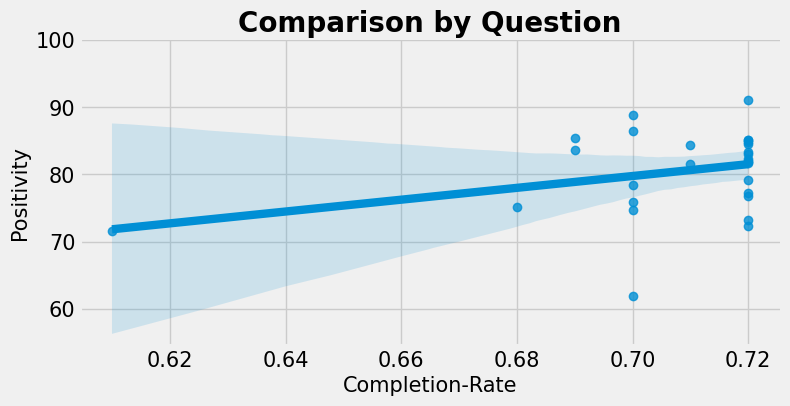

In [32]:
plt.style.use('fivethirtyeight')
ax = sns.lmplot(x='comp-rate', y='actual-val', data=question_by_completion, legend=False, height=4, aspect=2)
plt.title('Comparison by Question', fontsize=20, weight='bold')
plt.xlabel("Completion-Rate",fontsize=15)
plt.ylabel("Positivity",fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim(top=100)
plt.show()

In [33]:
def get_index_col(data):
  data.index = np.arange(1, len(data) + 1)
  data['index1'] = data.index
  return data  

def get_qn27_data(data):
  q27_rows = data[data['Question Num'] == 'Q27']['index1'].values.tolist()
  with_27qn = pd.DataFrame(columns=list(data.columns))
  for i in range(len(q27_rows)):
    new_data_27 = data.iloc[q27_rows[i]-27:q27_rows[i]]
    with_27qn = pd.concat([with_27qn, new_data_27], ignore_index=True)
  return with_27qn

def get_qn28_data(data):
  q28_rows = data[data['Question Num'] == 'Q28']['index1'].values.tolist()
  with_28qn = pd.DataFrame(columns=list(data.columns))
  for i in range(len(q28_rows)):
    new_data_28 = data.iloc[q28_rows[i]-27:q28_rows[i]]
    with_28qn = pd.concat([with_28qn, new_data_28], ignore_index=True)
  return with_28qn

def generate_subsets(data):
  data = get_index_col(data)
  english_final = get_qn27_data(data)
  not_english_final = get_qn28_data(data)
  drop_rows_1 = not_english_final['index1'].values.tolist()
  drop_rows_2 = english_final['index1'].values.tolist()
  uk_final = data.copy()
  uk_final = data[~(data['index1'].isin(drop_rows_1))]
  uk_final = uk_final[~(uk_final['index1'].isin(drop_rows_2))]
  return english_final, not_english_final, uk_final

In [34]:
english_final, not_english_final, uk_final = generate_subsets(df)

C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\551384533.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  with_27qn = pd.concat([with_27qn, new_data_27], ignore_index=True)
C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\551384533.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  with_28qn = pd.concat([with_28qn, new_data_28], ignore_index=True)


In [35]:
print(english_final.shape)
print(not_english_final.shape)
print(uk_final.shape)

(294732, 16)
(78111, 16)
(15938, 16)


In [36]:
df['Responses'].describe()

count    388781.000000
mean        134.465747
std         682.210568
min           0.100000
25%          15.000000
50%          31.000000
75%          71.000000
max       16161.500000
Name: Responses, dtype: float64

In [37]:
df[df['Population']==df['Population'].max()]

,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num,index1
2653,UK,UK,CAH16-01-01,Law,How good are teaching staff at explaining thi...,16113.1,24940.0,4562.48,10023.86,1263.06,263.73,NaN,90.5,64.9,Q01,2653
2654,UK,UK,CAH16-01-01,Law,How often do teaching staff make the subject ...,16087.0,24940.0,3085.85,9275.44,3076.59,649.07,NaN,76.8,64.9,Q02,2654
2655,UK,UK,CAH16-01-01,Law,How often is the course intellectually stimul...,16152.5,24940.0,6314.32,7455.72,1880.43,501.99,NaN,85.3,64.9,Q03,2655
2656,UK,UK,CAH16-01-01,Law,How often does your course challenge you to a...,16159.8,24940.0,6403.77,6999.37,2119.66,636.99,NaN,82.9,64.9,Q04,2656
2657,UK,UK,CAH16-01-01,Law,To what extent have you had the chance to exp...,16121.8,24940.0,5248.96,7712.85,2679.22,480.81,NaN,80.4,64.9,Q05,2657
2658,UK,UK,CAH16-01-01,Law,How well does your course introduce subjects ...,16109.2,24940.0,4728.54,8461.35,2389.56,529.79,NaN,81.9,64.9,Q06,2658
2659,UK,UK,CAH16-01-01,Law,To what extent have you had the chance to bri...,16098.4,24940.0,4648.94,7662.40,3234.64,552.44,NaN,76.5,64.9,Q07,2659
2660,UK,UK,CAH16-01-01,Law,To what extent does your course have the righ...,16118.9,24940.0,5542.89,6254.26,3197.29,1124.47,NaN,73.2,64.9,Q08,2660
2661,UK,UK,CAH16-01-01,Law,How well has your course developed your knowl...,16144.2,24940.0,5520.91,7503.00,2395.45,724.85,NaN,80.7,64.9,Q09,2661
2662,UK,UK,CAH16-01-01,Law,How clear were the marking criteria used to a...,16149.6,24940.0,4116.08,7327.22,3661.44,1044.84,NaN,70.9,64.9,Q10,2662


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388781 entries, 1 to 388781
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UKPRN          388781 non-null  object 
 1   Provider name  388781 non-null  object 
 2   Subject code   388781 non-null  object 
 3   Subject        388781 non-null  object 
 4   Question       388781 non-null  object 
 5   Responses      388781 non-null  float64
 6   Population     388781 non-null  float64
 7   Option 1       388781 non-null  float64
 8   Option 2       388781 non-null  float64
 9   Option 3       388781 non-null  float64
 10  Option 4       388781 non-null  float64
 11  Option 5       2893 non-null    float64
 12  Positivity     388781 non-null  float64
 13  Response Rate  388781 non-null  float64
 14  Question Num   388781 non-null  object 
 15  index1         388781 non-null  int32  
dtypes: float64(9), int32(1), object(6)
memory usage: 47.5+ MB


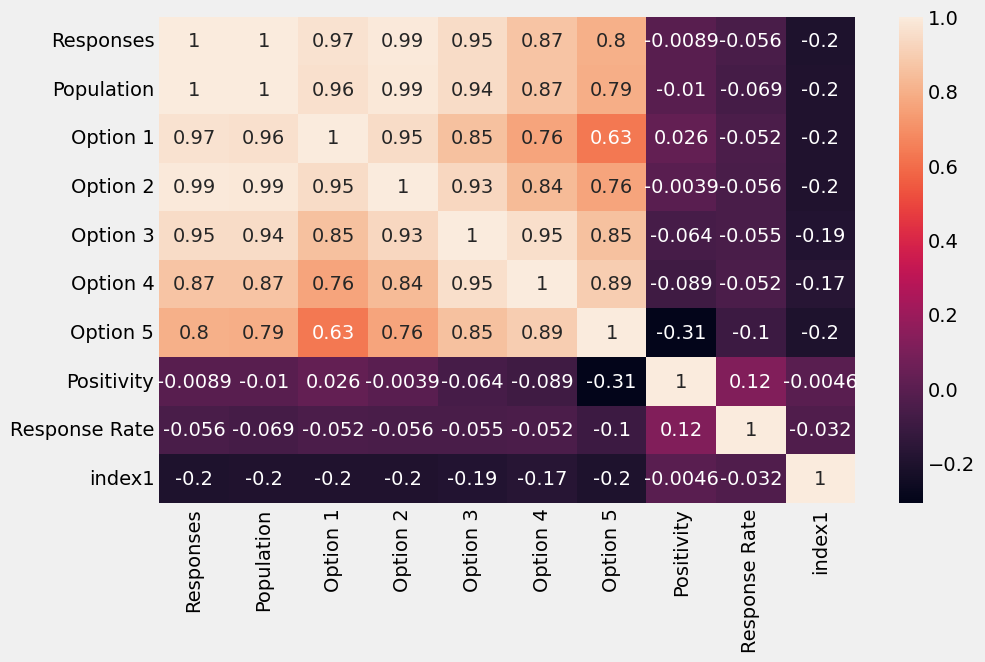

In [39]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [57]:
df.head()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity,N_Q01,N_Q02,N_Q03,N_Q04,N_Q05,...,N_Q20,N_Q21,N_Q22,N_Q23,N_Q24,N_Q25,N_Q26,N_Q28,R_Non-English,R_English
294314,22.0,62.8,11.9,3.2,84.8,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
294315,14.2,66.7,16.0,3.2,80.9,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
294316,63.2,29.5,3.6,3.6,92.7,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
294317,48.2,29.5,17.7,4.5,77.7,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
294318,32.4,46.1,18.7,2.7,78.5,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
df['Provider name'].unique()

array(['UK', 'England', 'Northern Ireland', 'Scotland', 'Wales',
       'Association of British Dispensing Opticians(The)',
       'AECC University College',
       'Anglia Ruskin University Higher Education Corporation',
       'Arts Educational Schools(The)',
       'Arts University Bournemouth, the', 'Askham Bryan College',
       'Barnet & Southgate College', 'Barnsley College',
       'Bath Spa University', 'Bedford College', 'Belfast Bible College',
       'University College Birmingham', 'Bishop Auckland College',
       'Bishop Burton College', 'Blackburn College',
       'Blackpool and the Fylde College', 'Boston College',
       'Bournemouth University', 'Bradford College',
       'Bridgwater and Taunton College', 'University of Brighton',
       'BCNO Limited', 'University College of Osteopathy (The)',
       'Brockenhurst College', 'London South East Colleges',
       'Brunel University London', 'Buckinghamshire New University',
       'Burnley College', 'Burton and South D

In [60]:
def get_provider_rows(data, provider_name):
  data = data[data['Provider name'].str.contains(provider_name)]
  return data

def get_survey_sets(data):
  set_count = len(data) / 27
  print('Number of Survey sets :-', set_count)
  print('Course Options :-')
  for x in range(len(list(data['Subject'].unique()))):
    print(f'[{x}] :', list(data['Subject'].unique())[x])
  return data

def get_subject_survey(data, subject_name):
  relevant_subs = data[data['Subject'].str.contains(subject_name, case=False)]['Subject'].unique()
  sample = data[(data['Subject'] == relevant_subs[0])]
  # sample = data[(data['Subject'] == relevant_subs[0]) & (data['Level of study']=='All undergraduates')]
  return sample

def get_processed_data(sample, region):
  sample = sample[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
  sample['Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
  sample['Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
  sample['Opt-3'] = round((sample['Option 3'] / sample['Responses']) * 100, 1)
  sample['Opt-4'] = round((sample['Option 4'] / sample['Responses']) * 100, 1)
  only_options = sample[['Question Num', 'Opt-1', 'Opt-2', 'Opt-3', 'Opt-4']]
  region_false = ''
  if region == 'English': region_false = 'R_Non-English'
  else: region_false = 'R_English'
  only_options[region] = [region]*len(only_options['Opt-1'])
  only_options['Positivity'] = only_options['Opt-1'] + only_options['Opt-2']
  data_2 = pd.get_dummies(only_options, prefix=['N', 'R'], dtype=float)
  data_2[region_false] = [0.0]*len(data_2)
  return data_2

In [61]:
df = get_provider_rows(df, 'University of Glasgow')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 370842 to 375866
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UKPRN          3996 non-null   object 
 1   Provider name  3996 non-null   object 
 2   Subject code   3996 non-null   object 
 3   Subject        3996 non-null   object 
 4   Question       3996 non-null   object 
 5   Responses      3996 non-null   float64
 6   Population     3996 non-null   float64
 7   Option 1       3996 non-null   float64
 8   Option 2       3996 non-null   float64
 9   Option 3       3996 non-null   float64
 10  Option 4       3996 non-null   float64
 11  Option 5       148 non-null    float64
 12  Positivity     3996 non-null   float64
 13  Response Rate  3996 non-null   float64
 14  Question Num   3996 non-null   object 
dtypes: float64(9), object(6)
memory usage: 499.5+ KB


In [62]:
df = get_survey_sets(df)
df.info()

Number of Survey sets :- 148.0
Course Options :-
[0] : Medicine (non-specific)
[1] : Dentistry
[2] : Pharmacology
[3] : Adult nursing
[4] : Biomedical sciences (non-specific)
[5] : Anatomy, physiology and pathology
[6] : Nutrition and dietetics
[7] : Ecology and environmental biology
[8] : Microbiology and cell science
[9] : Zoology
[10] : Genetics
[11] : Molecular biology, biophysics and biochemistry
[12] : Others in biosciences
[13] : Sport and exercise sciences
[14] : Psychology (non-specific)
[15] : Veterinary medicine and dentistry
[16] : Others in veterinary sciences
[17] : Agriculture
[18] : Physics
[19] : Astronomy
[20] : Chemistry
[21] : Mathematics
[22] : Statistics
[23] : Mechanical engineering
[24] : Production and manufacturing engineering
[25] : Aeronautical and aerospace engineering
[26] : Bioengineering, medical and biomedical engineering
[27] : Civil engineering
[28] : Electrical and electronic engineering
[29] : Biotechnology
[30] : Computer science
[31] : Information

In [63]:
df = get_subject_survey(df, 'Mathematics')
survey_org = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 371556 to 375492
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UKPRN          81 non-null     object 
 1   Provider name  81 non-null     object 
 2   Subject code   81 non-null     object 
 3   Subject        81 non-null     object 
 4   Question       81 non-null     object 
 5   Responses      81 non-null     float64
 6   Population     81 non-null     float64
 7   Option 1       81 non-null     float64
 8   Option 2       81 non-null     float64
 9   Option 3       81 non-null     float64
 10  Option 4       81 non-null     float64
 11  Option 5       3 non-null      float64
 12  Positivity     81 non-null     float64
 13  Response Rate  81 non-null     float64
 14  Question Num   81 non-null     object 
dtypes: float64(9), object(6)
memory usage: 10.1+ KB


In [64]:
df.head()

,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num
371556,10007794,University of Glasgow,CAH09-01-01,Mathematics,How good are teaching staff at explaining thi...,44.5,66.7,10.5,29.0,4.0,1.0,NaN,88.8,66.7,Q01
371557,10007794,University of Glasgow,CAH09-01-01,Mathematics,How often do teaching staff make the subject ...,44.0,66.7,8.0,23.0,12.0,1.0,NaN,70.5,66.7,Q02
371558,10007794,University of Glasgow,CAH09-01-01,Mathematics,How often is the course intellectually stimul...,43.5,66.7,18.5,19.5,4.5,1.0,NaN,87.4,66.7,Q03
371559,10007794,University of Glasgow,CAH09-01-01,Mathematics,How often does your course challenge you to a...,44.5,66.7,16.0,21.0,7.0,0.5,NaN,83.1,66.7,Q04
371560,10007794,University of Glasgow,CAH09-01-01,Mathematics,To what extent have you had the chance to exp...,44.5,66.7,15.0,21.0,6.0,2.5,NaN,80.9,66.7,Q05


In [65]:
df = get_processed_data(df, 'Non-English')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 371556 to 375492
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Opt-1          81 non-null     float64
 1   Opt-2          81 non-null     float64
 2   Opt-3          81 non-null     float64
 3   Opt-4          81 non-null     float64
 4   Positivity     81 non-null     float64
 5   N_Q01          81 non-null     float64
 6   N_Q02          81 non-null     float64
 7   N_Q03          81 non-null     float64
 8   N_Q04          81 non-null     float64
 9   N_Q05          81 non-null     float64
 10  N_Q06          81 non-null     float64
 11  N_Q07          81 non-null     float64
 12  N_Q08          81 non-null     float64
 13  N_Q09          81 non-null     float64
 14  N_Q10          81 non-null     float64
 15  N_Q11          81 non-null     float64
 16  N_Q12          81 non-null     float64
 17  N_Q13          81 non-null     float64
 18  N_Q14   

C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\1794066155.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\1794066155.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_11700\1794066155.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [66]:
df.columns[4:]

Index(['Positivity', 'N_Q01', 'N_Q02', 'N_Q03', 'N_Q04', 'N_Q05', 'N_Q06',
       'N_Q07', 'N_Q08', 'N_Q09', 'N_Q10', 'N_Q11', 'N_Q12', 'N_Q13', 'N_Q14',
       'N_Q15', 'N_Q16', 'N_Q17', 'N_Q18', 'N_Q19', 'N_Q20', 'N_Q21', 'N_Q22',
       'N_Q23', 'N_Q24', 'N_Q25', 'N_Q26', 'N_Q28', 'R_Non-English',
       'R_English'],
      dtype='object')

In [67]:
questions_list = list(df.columns[4:-2])

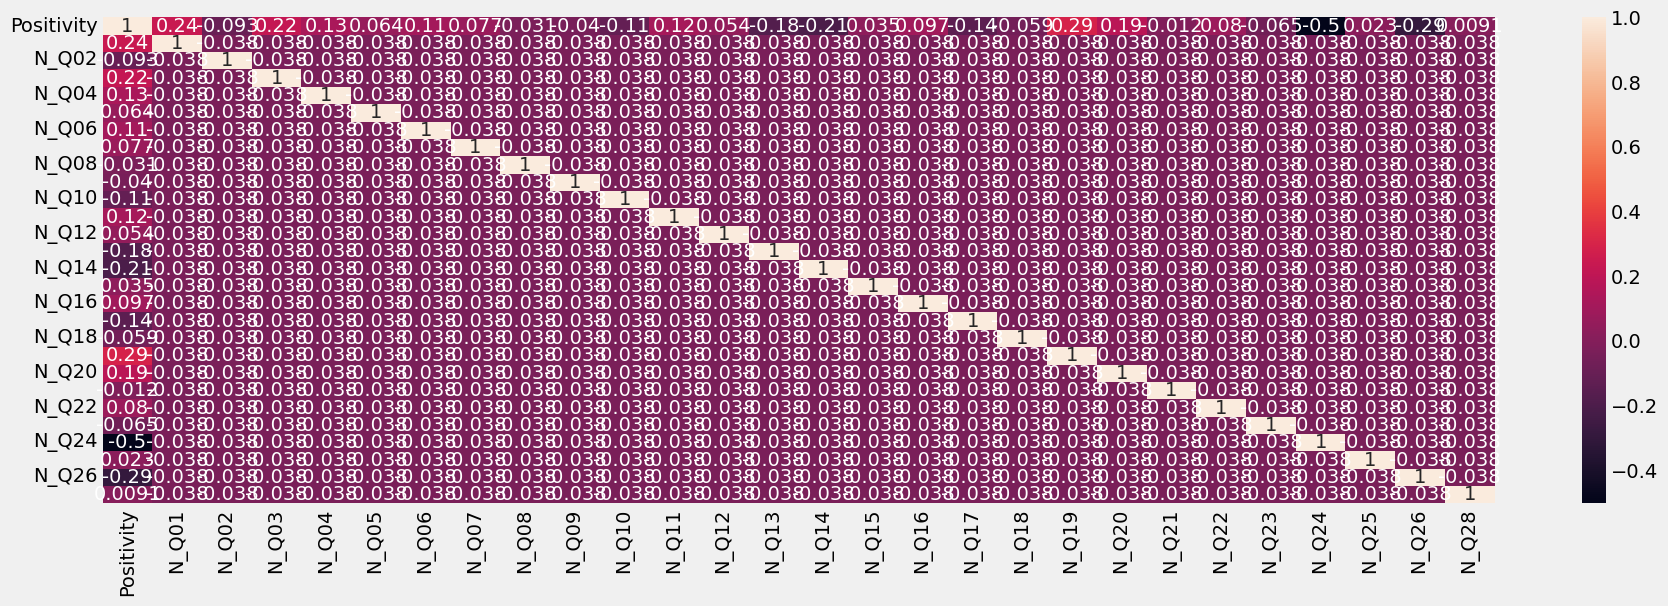

In [68]:
fig = plt.figure(figsize=(20, 6))
# sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
sns.heatmap(df[questions_list].corr(), annot=True)
plt.show()

In [69]:
survey_org[survey_org['Question Num']=='Q24']

,UKPRN,Provider name,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num
371579,10007794,University of Glasgow,CAH09-01-01,Mathematics,How clear is it that students' feedback on th...,44.5,66.7,11.5,11.5,18.5,3.0,NaN,51.7,66.7,Q24
373823,10007794,University of Glasgow,CAH09-01-01,Mathematics,How clear is it that students' feedback on th...,33.5,49.0,11.0,8.0,11.5,3.0,NaN,56.7,68.4,Q24
375489,10007794,University of Glasgow,CAH09-01-01,Mathematics,How clear is it that students' feedback on th...,11.0,17.5,0.5,3.5,7.0,0.0,NaN,36.4,62.9,Q24


In [76]:
import tensorflow as tf
from tensorflow import keras
model_new = tf.keras.models.load_model('../models/model_new_02.h5')

def get_prediction(data_2, model_path):
  data_size = data_2.values.size
  model_new = tf.keras.models.load_model(model_path)
  reshaped_data = data_2.values.reshape(1, 27, data_size // 27)
  X = reshaped_data[:, :26, :33]
  X = X.reshape(-1, 26 * 33)
  sample_input = X[0].reshape(1, -1)
  predicted_output = model_new.predict(sample_input)
  print(predicted_output[0])
  positivity = predicted_output[0][0]+predicted_output[0][1]
  print(positivity)
  return predicted_output, positivity

In [77]:
predicted_output, pred_pos = get_prediction(df, '../models/model_new_02.h5')
survey_org.iloc[26]['Positivity']
# df.iloc[26]['Positivity']
# print(predicted_output[0])
print('Original Pos:', float(survey_org.iloc[26]['Positivity']))
print('Pred Pos:', float(pred_pos))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
[32.330704 48.063206  9.506134  5.825429]
80.393906
Original Pos: 74.2
Pred Pos: 80.39390563964844
